In [65]:
import tensorflow as tf

In [66]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [67]:
x_train.shape

(60000, 28, 28)

In [68]:
x_test.shape

(10000, 28, 28)

In [69]:
import matplotlib.pyplot as plt

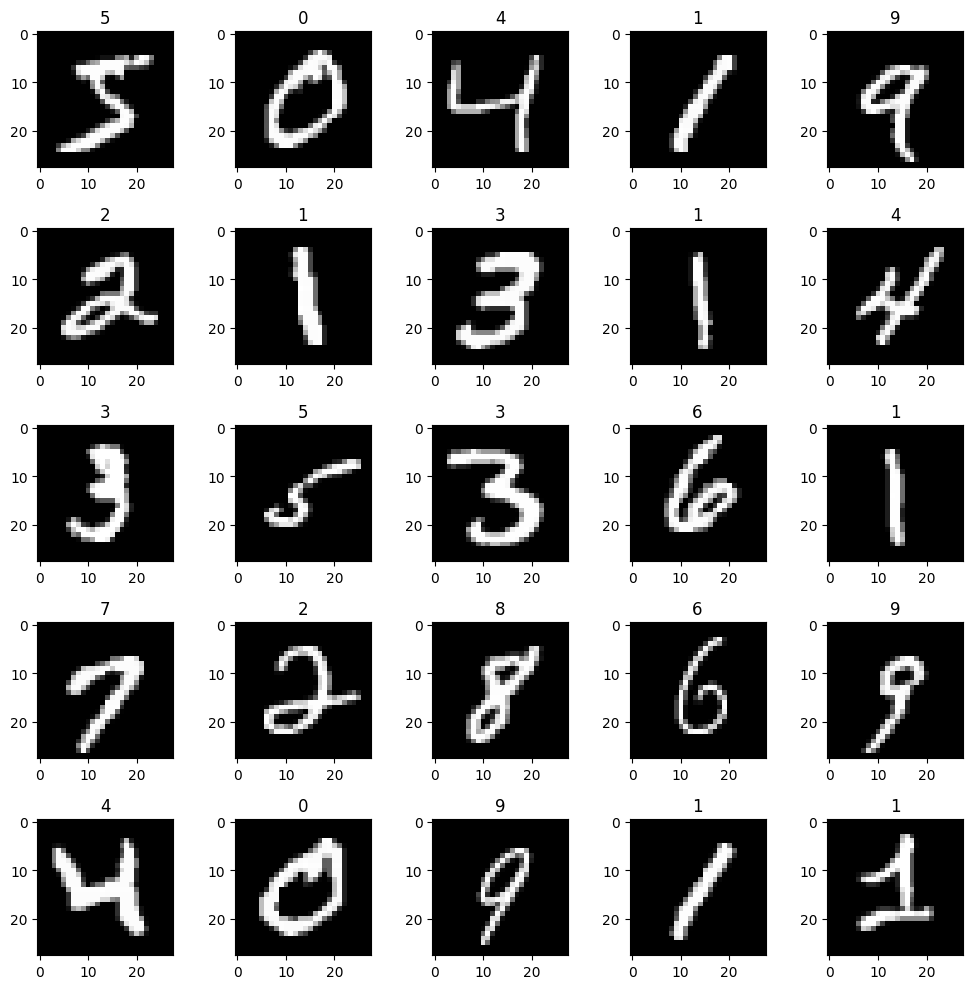

In [70]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.title(y_train[i])
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray')

In [71]:
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

In [72]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [73]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7867 - loss: 0.6361 - val_accuracy: 0.9740 - val_loss: 0.0883
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9719 - loss: 0.0982 - val_accuracy: 0.9827 - val_loss: 0.0618
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9805 - loss: 0.0709 - val_accuracy: 0.9855 - val_loss: 0.0577
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9840 - loss: 0.0565 - val_accuracy: 0.9846 - val_loss: 0.0524
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9878 - loss: 0.0439 - val_accuracy: 0.9783 - val_loss: 0.0759
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9886 - loss: 0.0382 - val_accuracy: 0.9852 - val_loss: 0.0593
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 0.9887 - val_loss: 0.0495
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9919 -

In [74]:
history = model.history.history

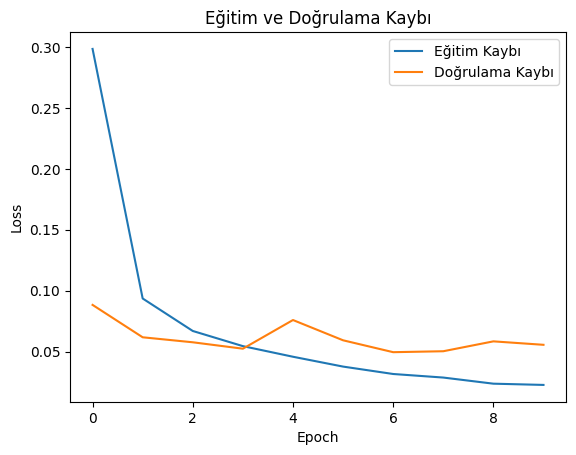

In [75]:
plt.plot(history['loss'], label='Eğitim Kaybı')
plt.plot(history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()

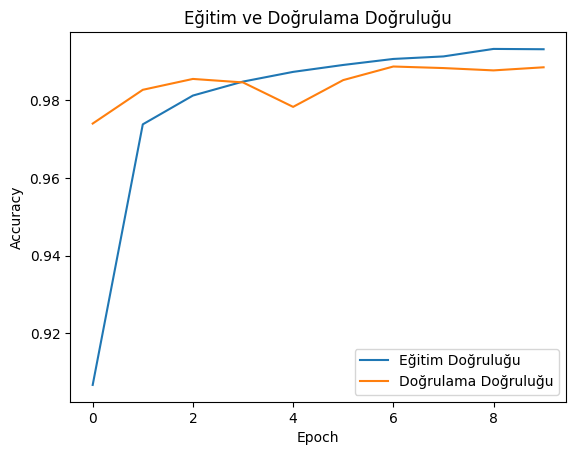

In [76]:
plt.plot(history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()

In [77]:
model.save('mnist_model.h5')